We analyze data for the United States Environmental Protection Agency (EPA). We are assigned to analyze data on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. We will use Python functions to gather statistics about air quality, then share insights with stakeholders.

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.

The Strategy division of Ripple Renewable Energy (RRE) operates in the following U.S. states: California, Florida, Michigan, Ohio, Pennsylvania, Texas. You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

We:
    
- Provide a summary of the mean AQI for the states in which RRE operates.
- Construct a boxplot visualization for AQI of these states using seaborn.
- Evaluate which state(s) may be most affected by this policy, based on the data and our boxplot visualization.
- Construct a confidence interval for the RRE state with the highest mean AQI.

They also asked:
    
- ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
- With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
- A new policy will affect those states with a mean AQI of 10 or greater. Would Michigan be affected by this new policy?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

C:\Users\Public\miniconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Load data from the .csv file into a DataFrame and save in a variable.
data = pd.read_csv("C:/Users/0&1/OneDrive/Documents/c4_epa_air_quality.csv", index_col = 0)

In [3]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


# Statistics

In [4]:
data.shape

(260, 9)

In [5]:
data["state_name"].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

In [6]:
data["aqi"].describe()

count    260.000000
mean       6.757692
std        7.061707
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       50.000000
Name: aqi, dtype: float64

In [7]:
np.mean(data["aqi"])



6.757692307692308

In [8]:
np.median(data["aqi"])


5.0

In [9]:
np.min(data["aqi"])


0

In [10]:
np.max(data["aqi"])


50

In [11]:
np.std(data["aqi"])

7.048113390607722

- "AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is considered to be unhealthy—at first for certain sensitive groups of people, then for everyone as AQI values increase."
- "An AQI of 100 for carbon monoxide corresponds to a level of 9.4 parts per million."
- The average AQI value in the data is approximately 6.76, which is considered safe with respect to carbon monoxide. Further, 75% of the AQI values are below 9.
- 75% of the AQI values in the data are below 9, which is considered good air quality.
- Funding should be allocated for further investigation of the less healthy regions in order to learn how to improve the conditions.

# Modified data

In [12]:
modified_data = pd.read_csv("C:/Users/0&1/OneDrive/Documents/modified_c4_epa_air_quality.csv")

In [13]:
modified_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [14]:
modified_data.shape

(260, 8)

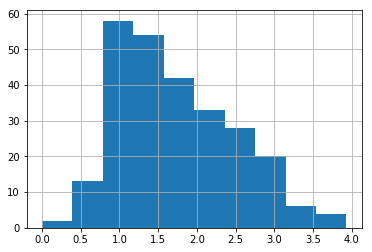

In [15]:
# Create a histogram to visualize distribution of aqi_log.
modified_data["aqi_log"].hist();

So there is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

# confidence intervals

In [16]:
# Define variable for aqi_log mean.
mean_aqi_log = modified_data["aqi_log"].mean()

print(mean_aqi_log)

1.7669210929985577


In [17]:
# Define variable for aqi_log standard deviation.
std_aqi_log = modified_data["aqi_log"].std()

print(std_aqi_log)

0.7147155520223721


Checking the empirical rules:

In [18]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log - 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = mean_aqi_log + 1 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

1.0522055409761855 2.48163664502093


In [19]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((modified_data["aqi_log"] >= lower_limit) & (modified_data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

In [20]:
# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviations below the mean.
upper_limit = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

0.33748998895381344 3.1963521970433018


In [21]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((modified_data["aqi_log"] >= lower_limit) & (modified_data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

In [22]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit = mean_aqi_log + 3 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

-0.3772255630685586 3.911067749065674


In [23]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
((modified_data["aqi_log"] >= lower_limit) & (modified_data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

The results we attained by applying the empirical rule:

- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

# Finding outliers using z-score

In [24]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
modified_data["z_score"] = stats.zscore(modified_data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)

modified_data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


In [26]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
modified_data[(modified_data["z_score"] > 3) | (modified_data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


The aqi_log for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data

that site can be studied further to determine what practices or changes might improve the air quality.

In [27]:
data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Near Road,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276316,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


the mean value of the aqi column is 6.757692. This value will be compared to the mean value after sampling with replacement

The count value for the aqi column is 260. This means there are 260 AQI measurements represented in this dataset.

In [29]:
population_mean = data['aqi'].mean()
population_mean

6.757692307692308

# Statistical tests

In [30]:
sampled_data = data.sample(n=50, replace=True, random_state=42)

In [31]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


In [32]:
sample_mean = sampled_data['aqi'].mean()
sample_mean

5.54

Due to sampling variability, the sample mean (sample_mean) is usually not the same as the population mean (population_mean). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in data.

# Apply the Central Limit Theorem

We take 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the central limit theorem, the mean of a sampling distribution should be roughly equal to the population mean. We complete the following steps to compute the mean of the sampling distribution with 10,000 samples.

- Create an empty list and assign it to a variable called estimate_list.
- Iterate through a for loop 10,000 times. To do this, make sure to utilize the range() function to generate a sequence of numbers from 0 to 9,999.
- In each iteration of the loop, use the sample() function to take a random sample (with replacement) of 50 AQI values from the population. Do not set random_state to a value.
- Use the list append() function to add the value of the sample mean to each item in the list.

In [33]:
estimate_list = []
for i in range(10000):
    estimate_list.append(data['aqi'].sample(n=50,replace=True).mean())

In [34]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,6.54
1,6.84
2,6.36
3,5.98
4,6.56
5,6.24
6,5.92
7,7.54
8,6.24
9,6.74


In [35]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.758286000000027

the mean for the sampling distribution of 10,000 random samples will vary as random_state was not set to a value.

Random sampling with replacement is related to the central limit theorem because it means we are drawing observations independently from a population. The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error.

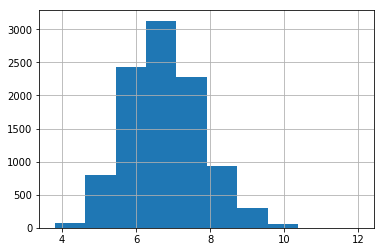

In [36]:
estimate_df['estimate'].hist()

In [37]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

0.7413225908290327

We visualize the relationship between our sampling distribution of 10,000 estimates and the normal distribution

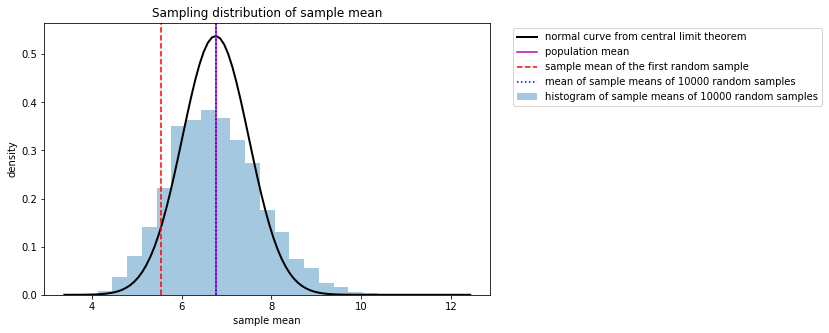

In [38]:
# Generate a grid of 100 values from xmin to xmax.
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if data.sample(n=50, replace=True, random_state=42) had a different value for random_state.
The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

Carbon monoxide levels are satisfactory in general.

Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.

In [39]:
aqi = pd.read_csv('C:/Users/0&1/OneDrive/Documents/c4_epa_air_quality.csv')

In [40]:
print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


All of the sites collected data on January 1st, 2018.

The minimum AQI value is 0 and the maximum AQI value is 50.

all states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI.

In [41]:
# Create a list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]
# Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


In [42]:
import seaborn as sns

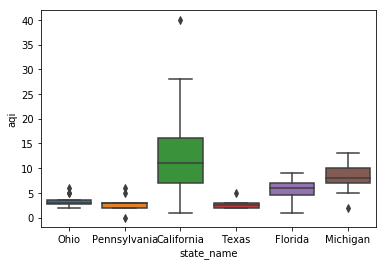

In [43]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

most affected by the policy:

- California: The mean and a signficant portion of the boxplot range over 10.
- Michigan: While the mean is below 10, the boxplot ranges above 10.
    
Construct a confidence interval for the RRE state with the highest mean AQI

In [44]:
aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

In [45]:
confidence_level = 0.95
confidence_level

0.95

In [46]:
z_value = 1.96

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


In [47]:
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

In [48]:
stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)

A confidence interval at the 95% level of confidence from this sample data yielded [10.36 , 13.88], which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."

# Hypotheses

In [49]:
print("Use head() to show a sample of data")
print(aqi.head())

print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

print('for a more')

Use head() to show a sample of data
   Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure  arithmetic_mean  aqi  
0  Parts per million         0.473684    7  
1 

Ohio and New York both have a higher number of observations to work with in this dataset.

# Hypothesis 1

In [50]:
# Create dataframes for each sample being compared in our test
ca_la = aqi[aqi['county_name']=='Los Angeles']
ca_other = aqi[(aqi['state_name']=='California') & (aqi['county_name']!='Los Angeles')]

𝐻0 : There is no difference in the mean AQI between Los Angeles County and the rest of California.

𝐻𝐴 : There is a difference in the mean AQI between Los Angeles County and the rest of California.

In [51]:
significance_level = 0.05
significance_level

0.05

In [52]:
# Compute our p-value here
stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)

Ttest_indResult(statistic=2.1107010796372014, pvalue=0.049839056842410995)

With a p-value (0.049) being less than 0.05 (as our significance level is 5%), reject the null hypothesis in favor of the alternative hypothesis.

Therefore, a metropolitan strategy may make sense in this case.

# Hypothesis 2

In [53]:
# Create dataframes for each sample being compared in our test
ny = aqi[aqi['state_name']=='New York']
ohio = aqi[aqi['state_name']=='Ohio']

𝐻0 : The mean AQI of New York is greater than or equal to that of Ohio.

𝐻𝐴 : The mean AQI of New York is below that of Ohio

In [54]:
# Compute our p-value here

tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], equal_var=False)
print(tstat)
print(pvalue)

-2.025951038880333
0.060893005383869395


With a p-value (0.030) of less than 0.05 (as our significance level is 5%) and a t-statistic < 0 (-2.036), reject the null hypothesis in favor of the alternative hypothesis.

Therefore, we can conclude at the 5% significance level that New York has a lower mean AQI than Ohio.

# Hypothesis 3

In [55]:
# Create dataframes for each sample being compared in our test

michigan = aqi[aqi['state_name']=='Michigan']

𝐻0 : The mean AQI of Michigan is less than or equal to 10.

𝐻𝐴 : The mean AQI of Michigan is greater than 10.

In [56]:
tstat, pvalue = stats.ttest_1samp(michigan['aqi'], 10)
print(tstat)
print(pvalue)

-1.7395913343286131
0.12011896137197813


With a p-value (0.940) being greater than 0.05 (as our significance level is 5%) and a t-statistic < 0 (-1.74), fail to reject the null hypothesis.

Therefore, we cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would most likely not be affected by the new policy.